In [83]:
import pandas as pd
import csv

In [86]:
df = pd.read_csv('headlines.csv')
df.sample(3)

,Title,Date,URL
27100,Berlusconi: “Ricordati di spolverargli la sedia”,5/31/16,https://quotidiano.repubblica.it/edicola/searc...
13052,"""Boffo, l'ultima vittima del premier"" Il New ...",9/3/09,http://www.repubblica.it/2009/09/sezioni/polit...
14384,Ciancimino jr ritrova le lettere a Berlusconi,4/8/10,https://quotidiano.repubblica.it/edicola/searc...


### Some basic cleaning

In [87]:
df.dtypes

Title    object
Date     object
URL      object
dtype: object

In [89]:
# Adding Year column
df['Date']= pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df.sample(3)

,Title,Date,URL,Year
11233,"Regali, aiuti e inviti in Sardegna ecco le ca...",2008-07-08,http://www.repubblica.it/2008/07/sezioni/polit...,2008
26778,La fine di Forza Italia anche la Melini lascia...,2016-02-11,https://quotidiano.repubblica.it/edicola/searc...,2016
21264,"Berlusconi e le tangenti:""Si pagano, no ai mor...",2013-02-14,http://www.repubblica.it/speciali/politica/ele...,2013


### Word tokenization (nltk)

In [187]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

In [188]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mdallastella/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mdallastella/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [189]:
# Get the default stopwords from NLTK
stop_words = set(stopwords.words('italian'))

In [190]:
# Manually add additional stopwords
additional_stopwords = ["berlusconi", "silvio", "ci","cosi", "intervista", "forza", "casa", "anti", "co", "cir"
                        "sì", "può", "mai", "no", "ora", "fa", "due", "deve", "niente", "de", "ex", "prima", "sempre",
                        "va", "così", "via", "dopo", "italia", "unomini", "legati", "va", "fra", "adesso", "fuori",
                        "me", "d", "senza", "ecco", "ancora", "vuole", "anni", "va", "manca", "tante", "piu", "oggi",
                       "poi", "dà", "quel", "essere", "detto", "cosa", "qui", "ok", "far", "co", "cosi", "manca", "de",
                       "jr", "grandi", "ore", "sa", "piu", "san", "anti", "s√¨", "verso", "va", "tre", "tante", "stato", "puo"] 
stop_words.update(additional_stopwords)

In [191]:
tokenized_titles = []

for title in df['Title']:
    tokenized_title = []
    words = word_tokenize(title, language='italian')
    for word in words:
        if word.isalpha() and word.lower() not in stop_words:
            tokenized_title.append(word.lower())
    tokenized_titles.append(tokenized_title)

df['Tokenized Title'] = tokenized_titles

In [192]:
df.sample(3)

,Title,Date,URL,Year,Tokenized Title
1027,"KOHL - BERLUSCONI, VERTICE A BONN",1994-06-16,https://quotidiano.repubblica.it/edicola/searc...,1994,"[kohl, vertice, bonn]"
24938,Fi vuole la norma salva-Galan “Non può andare ...,2014-07-03,https://quotidiano.repubblica.it/edicola/searc...,2014,"[fi, norma, andare, carcere, riforme, renzi, v..."
951,LA SFIDA DEI POPOLARI A BERLUSCONI,1994-05-18,https://quotidiano.repubblica.it/edicola/searc...,1994,"[sfida, popolari]"


### Getting most common words

In [193]:
# Get most common words from tokenized titles.

n = 100

all_words = [word.lower() for title in df['Tokenized Title'] for word in title]

# for title in df['Tokenized Title']:
#     for word in title:
#         all_words.append(word.lower())

word_freq = FreqDist(all_words)
most_common_words = word_freq.most_common(n)

top_100 = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
top_100.to_csv('top_100.csv')
top_100.head()


,Word,Frequency
0,governo,945
1,salvini,750
2,pdl,708
3,renzi,660
4,pd,642


### Get most common words per each year


In [194]:
grouped_df = df.groupby(["Year"])["Tokenized Title"].sum()
grouped_df

Year
1984    [espande, attività, finanziaria, rizzoli, scen...
1985    [piace, legge, tv, critica, tv, raccogliere, p...
1986    [agnelli, frena, milan, supervalutato, sara, d...
1987    [tanzi, gioco, carte, mercato, tv, clan, criti...
1988    [pippo, scambio, doni, pace, agnes, entra, gar...
1989    [stranieri, confermati, perso, fiducia, giuro,...
1990    [spagna, rompera, partner, craxi, febbre, alta...
1991    [accuse, arbitro, cerca, alibi, smentisce, gio...
1992    [battezzare, salva, cinq, opzione, esalta, fra...
1993    [milan, invidiato, voglio, gs, guai, chiede, f...
1994    [documento, eccezionale, berlusconista, dirett...
1995    [scalfaro, verita, bettazzi, realizza, piano, ...
1996    [promette, senatur, rilancia, slitta, processo...
1997    [parla, affari, pensa, bicamerale, detta, cond...
1998    [previti, ingenti, somme, squillante, attacco,...
1999    [eredità, governo, saccà, raiuno, mastella, ba...
2000    [bossi, conferma, patto, tratto, spot, biscard...
2001    [

In [195]:
from collections import Counter

In [196]:
grouped_df.head()

Year
1984    [espande, attività, finanziaria, rizzoli, scen...
1985    [piace, legge, tv, critica, tv, raccogliere, p...
1986    [agnelli, frena, milan, supervalutato, sara, d...
1987    [tanzi, gioco, carte, mercato, tv, clan, criti...
1988    [pippo, scambio, doni, pace, agnes, entra, gar...
Name: Tokenized Title, dtype: object

In [197]:
# Define how many words we want to consider
words_count = 30

data = []

# Loop through the index and values of the Series
for year, words in grouped_df.items():
    counter = Counter(words)
    most_common = counter.most_common(words_count)

    for word, count in most_common:
        data.append({'Year': year, 'Word': word, 'Count': count})

# Create a new DataFrame from the list of dictionaries
result_df = pd.DataFrame(data)
result_df.head(10)

,Year,Word,Count
0,1984,rai,4
1,1984,guerra,2
2,1984,pubblicita,2
3,1984,impero,2
4,1984,espande,1
5,1984,attività,1
6,1984,finanziaria,1
7,1984,rizzoli,1
8,1984,scende,1
9,1984,pista,1


In [179]:
result_df['Year'].value_counts()

Year
1984    30
1985    30
2006    30
2007    30
2008    30
2009    30
2010    30
2011    30
2012    30
2013    30
2014    30
2015    30
2016    30
2017    30
2018    30
2019    30
2020    30
2021    30
2022    30
2005    30
2004    30
2003    30
1993    30
1986    30
1987    30
1988    30
1989    30
1990    30
1991    30
1992    30
1994    30
2002    30
1995    30
1996    30
1997    30
1998    30
1999    30
2000    30
2001    30
2023    30
Name: count, dtype: int64

In [198]:
# Save unique words to a .csv file
unique_words = result_df['Word'].unique()
unique_words_df = pd.DataFrame({'Word': unique_words})
unique_words_df.to_csv('unique_words.csv', index=False)

## Assign Categories

I have created locally a new file called `categories_words.csv` in which I attributed to each word from the most common ones a category. For example, `verb` or `politics`.

In [199]:
categories = pd.read_csv('categories.csv')
categories.head()

,Word,Category
0,rai,politics
1,guerra,sentiment
2,pubblicita,business
3,impero,business
4,espande,verb


In [200]:
# Adding the category to our main df
result_df = result_df.merge(categories, on='Word', how='left')
result_df.head()

,Year,Word,Count,Category
0,1984,rai,4,politics
1,1984,guerra,2,sentiment
2,1984,pubblicita,2,business
3,1984,impero,2,business
4,1984,espande,1,verb


In [201]:
result_df.head(10)

,Year,Word,Count,Category
0,1984,rai,4,politics
1,1984,guerra,2,sentiment
2,1984,pubblicita,2,business
3,1984,impero,2,business
4,1984,espande,1,verb
5,1984,attività,1,other
6,1984,finanziaria,1,politics
7,1984,rizzoli,1,business
8,1984,scende,1,verb
9,1984,pista,1,other


### Stream graphs

In [202]:
import matplotlib.pyplot as plt
import numpy as np

In [208]:
# pivot  DataFrame so that each 'Word' becomes a separate column:
pivot_df = result_df.pivot(index='Year', columns='Word', values='Count').fillna(0)
pivot_df.sample(3)


Word,accordo,accusa,accuse,addio,affare,affari,agnelli,agnes,ajax,alema,...,vita,voleva,votare,voti,voto,vuol,walter,zangrillo,zeffirelli,zelensky
Year,,,,,,,,,,,,,,,,,,,,,
1992,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0


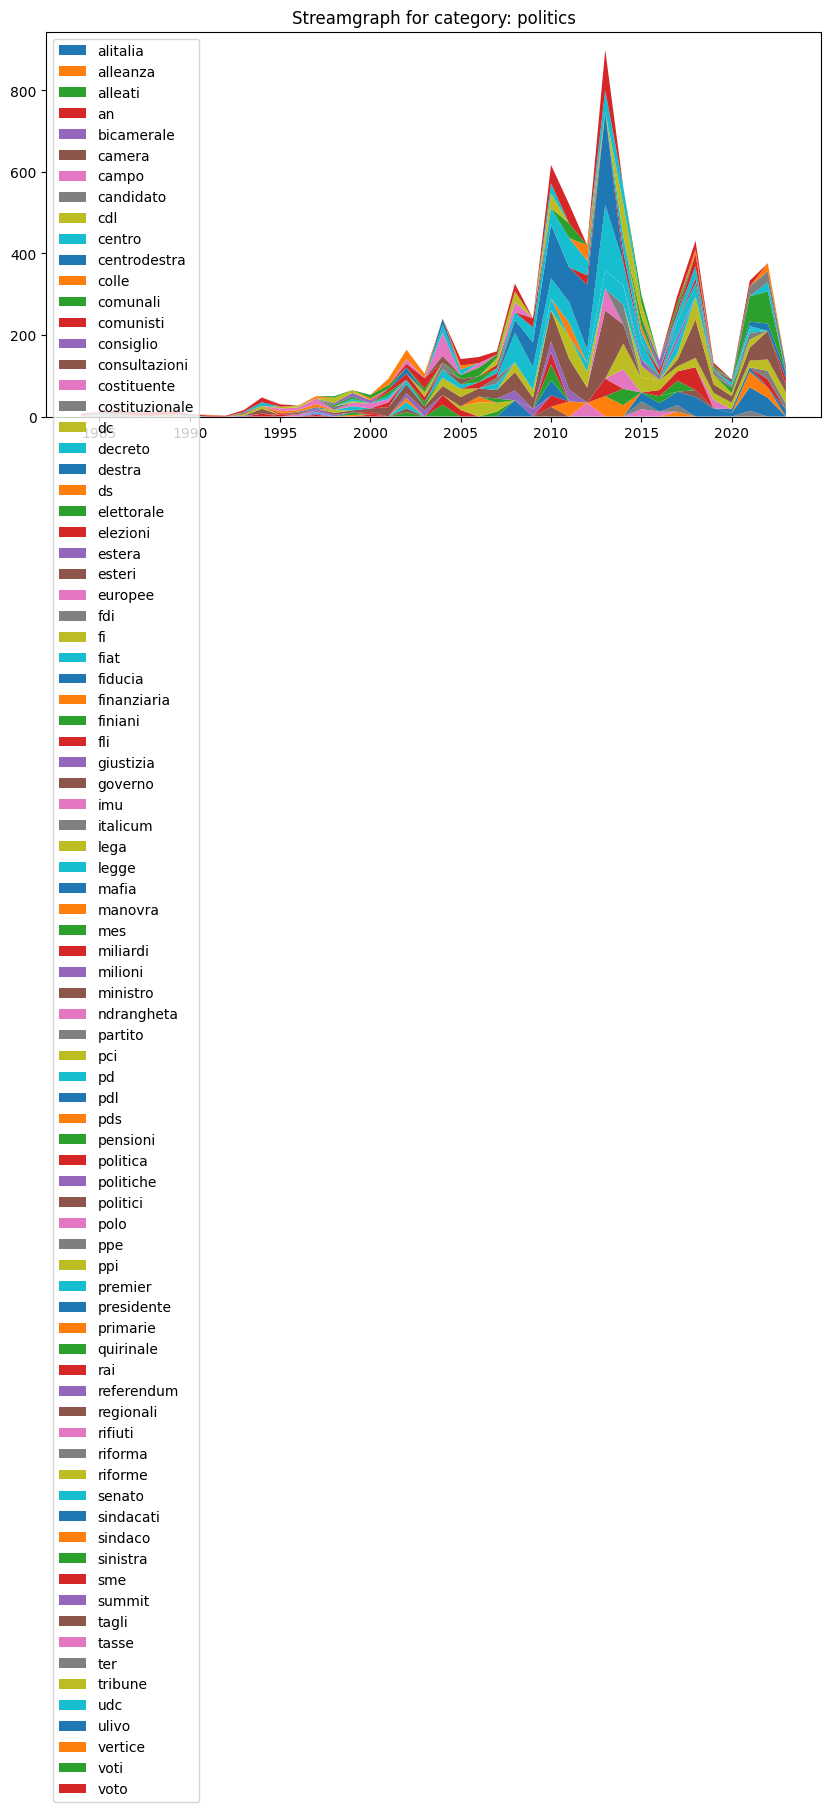

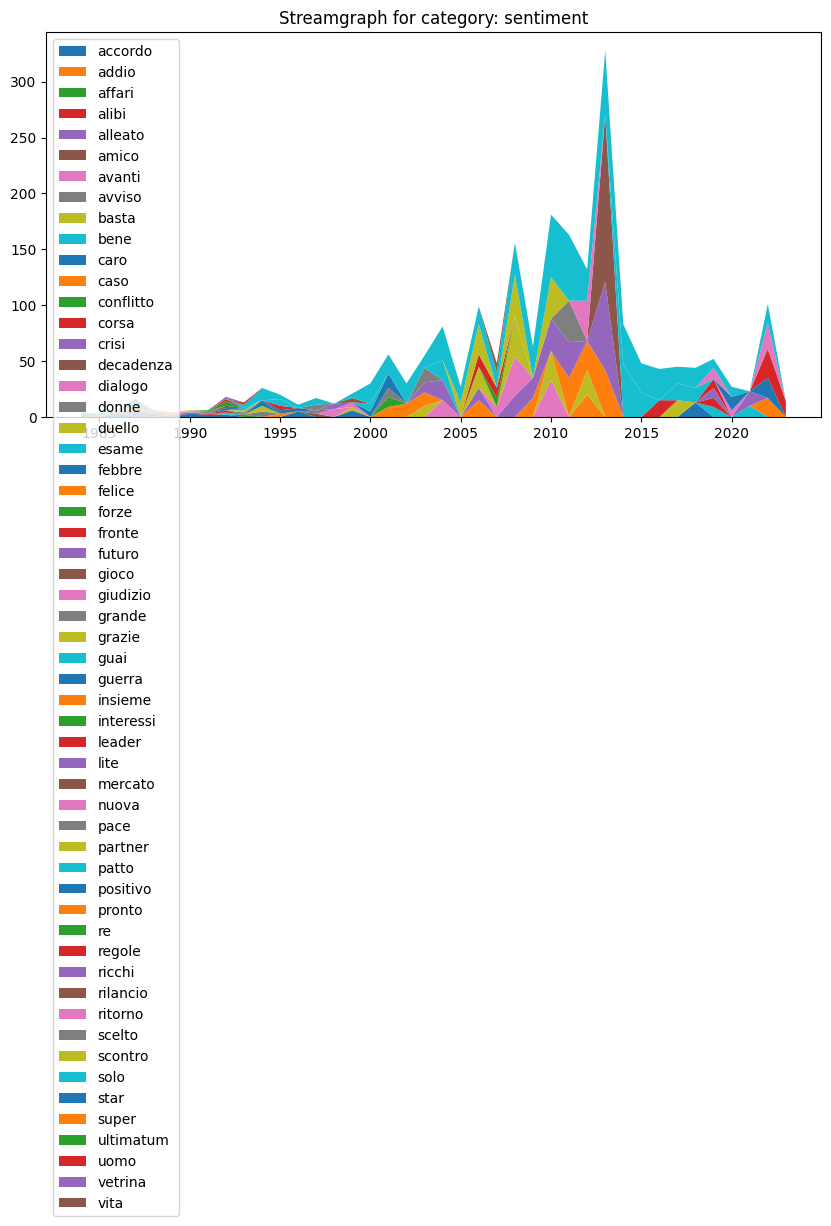

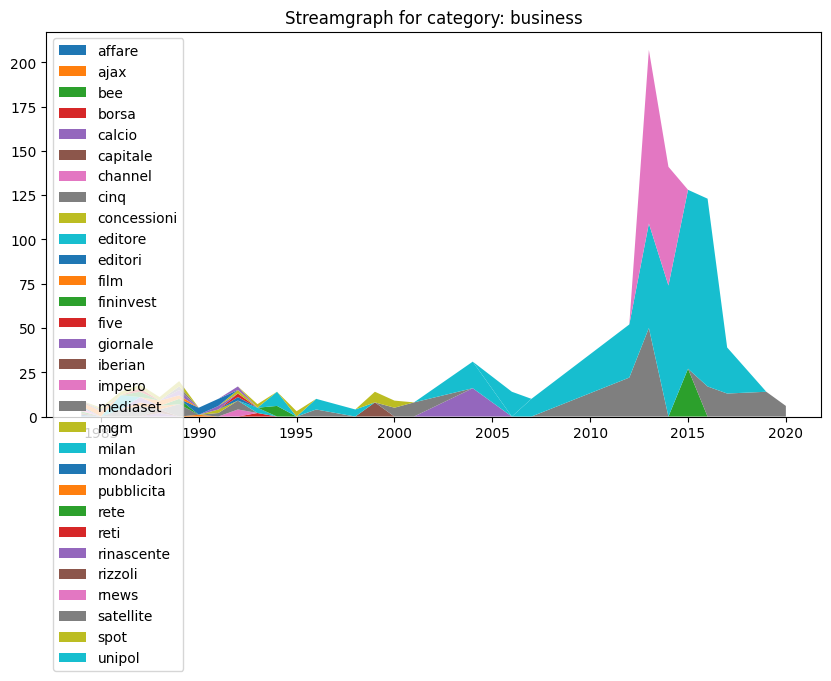

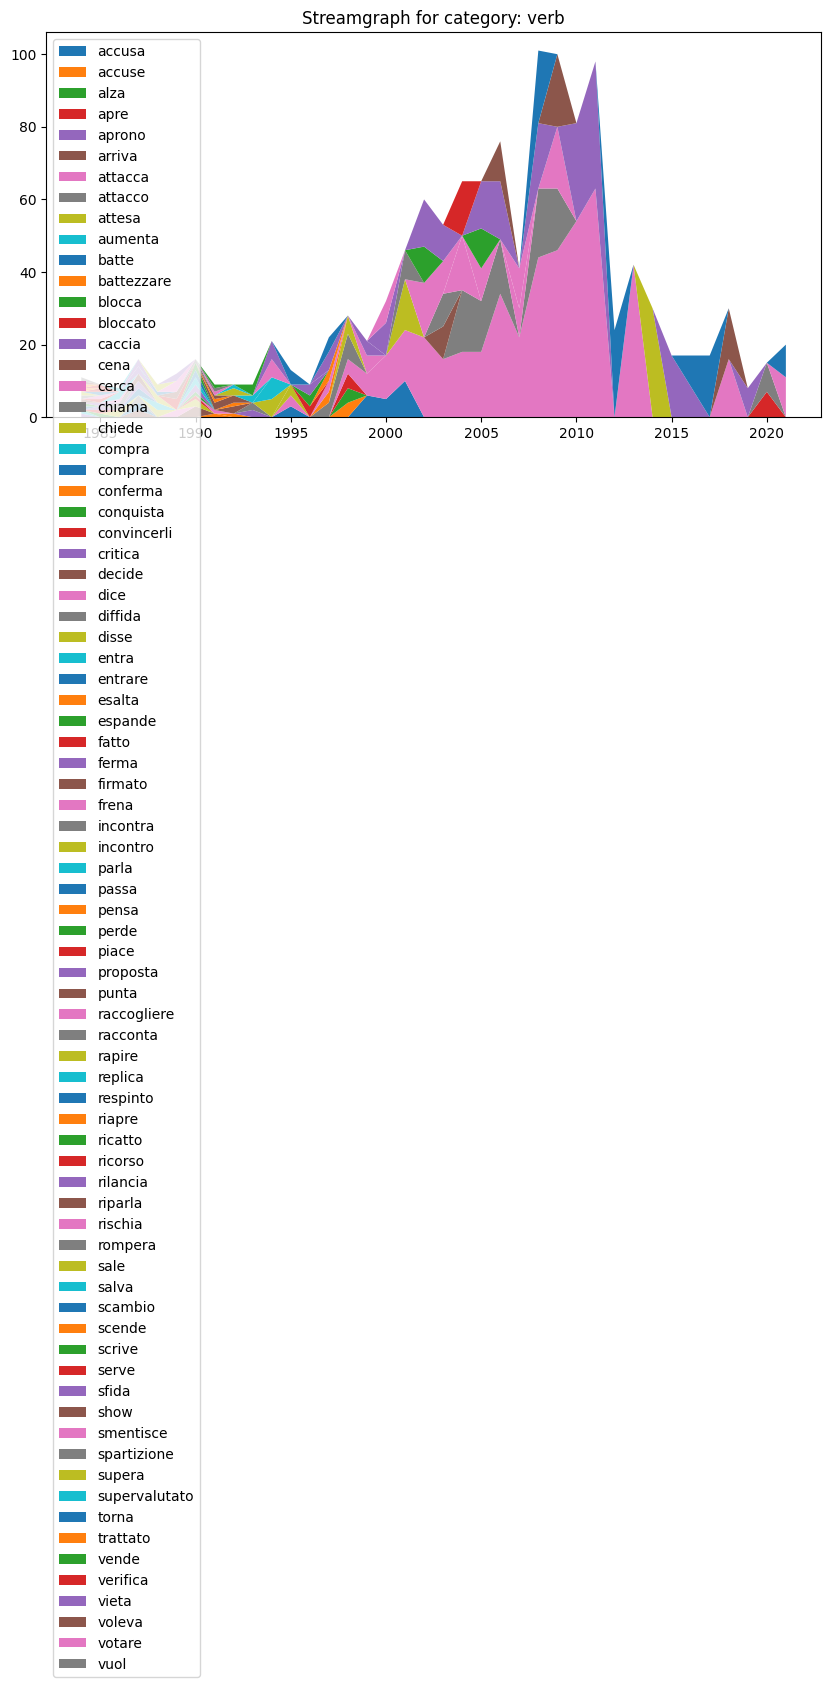

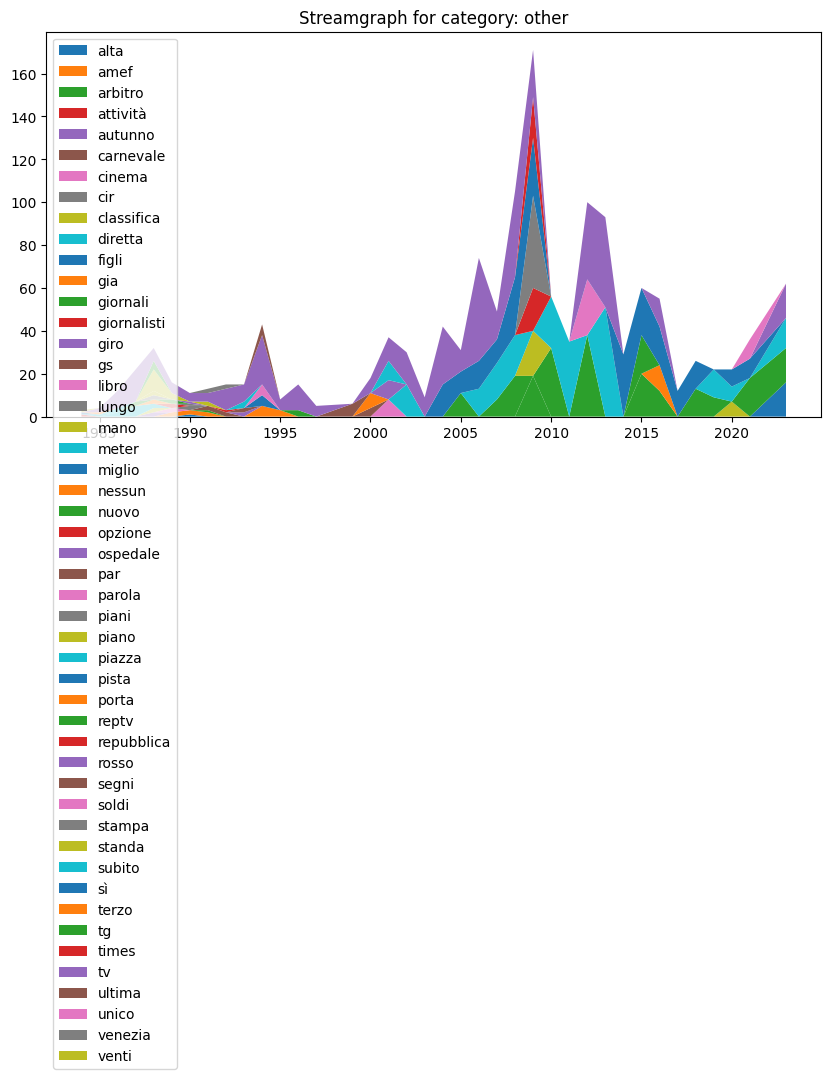

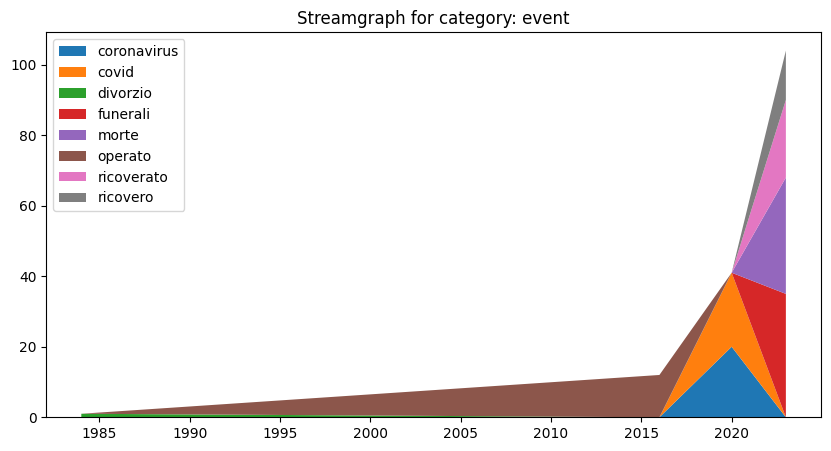

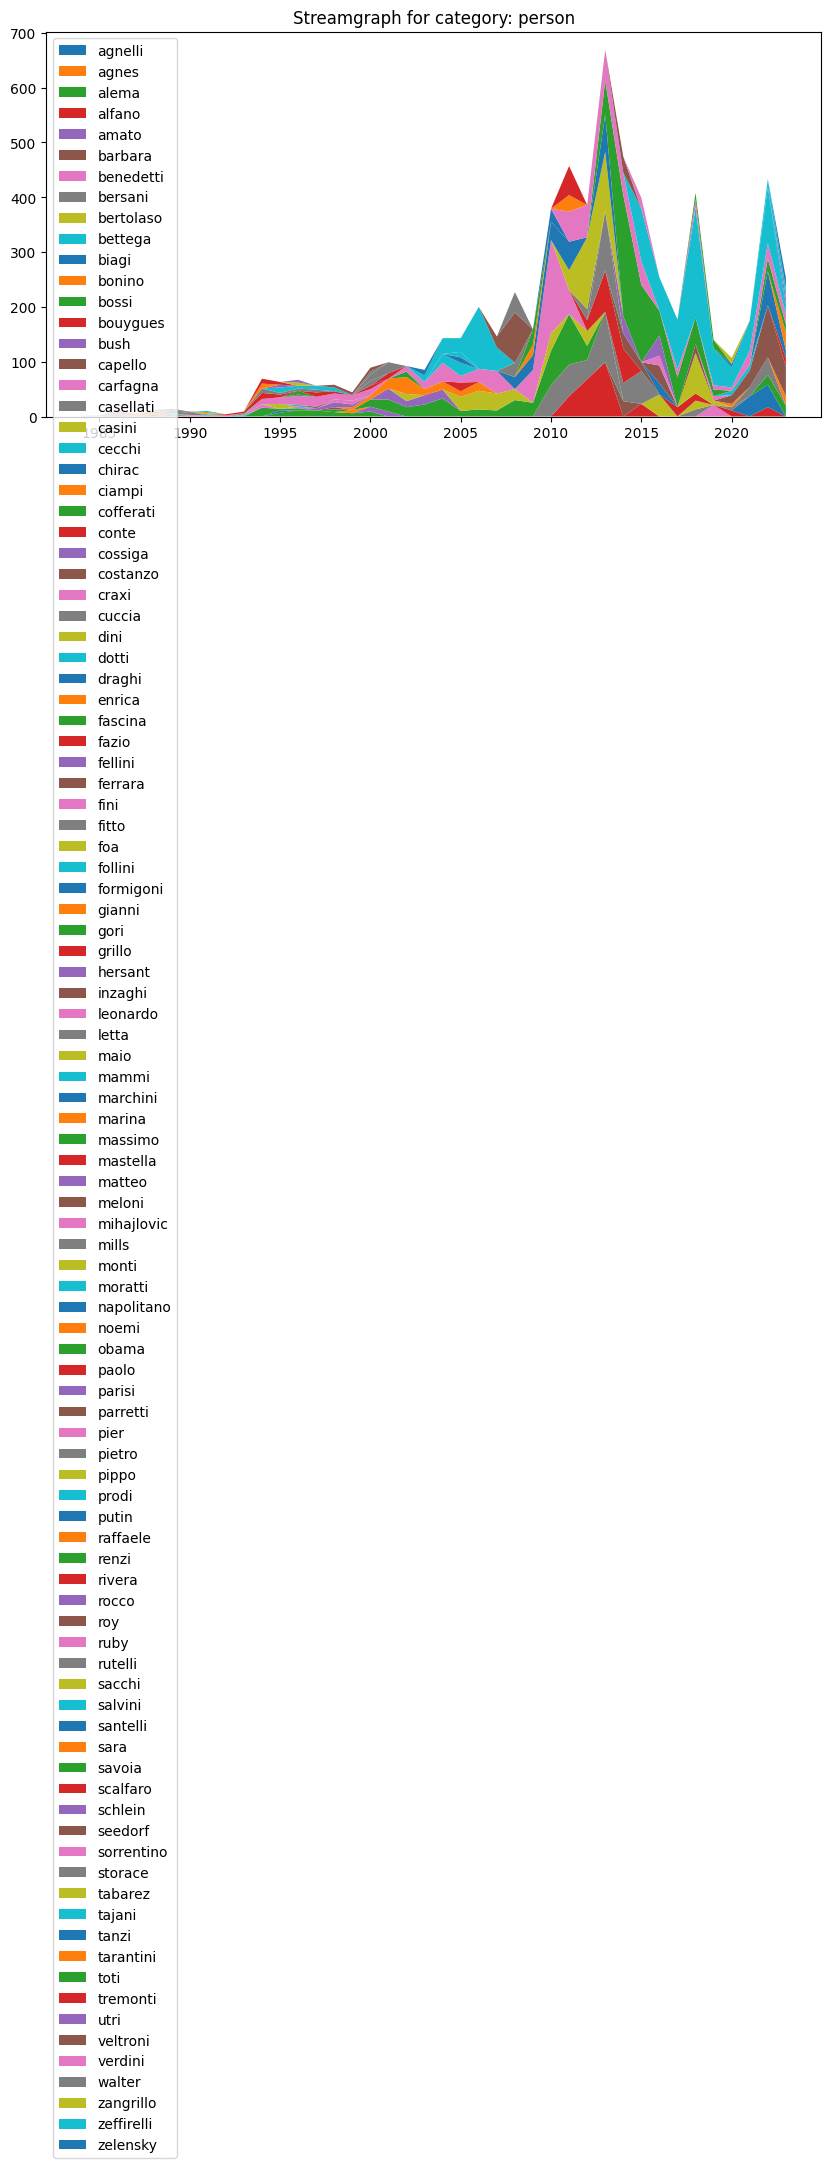

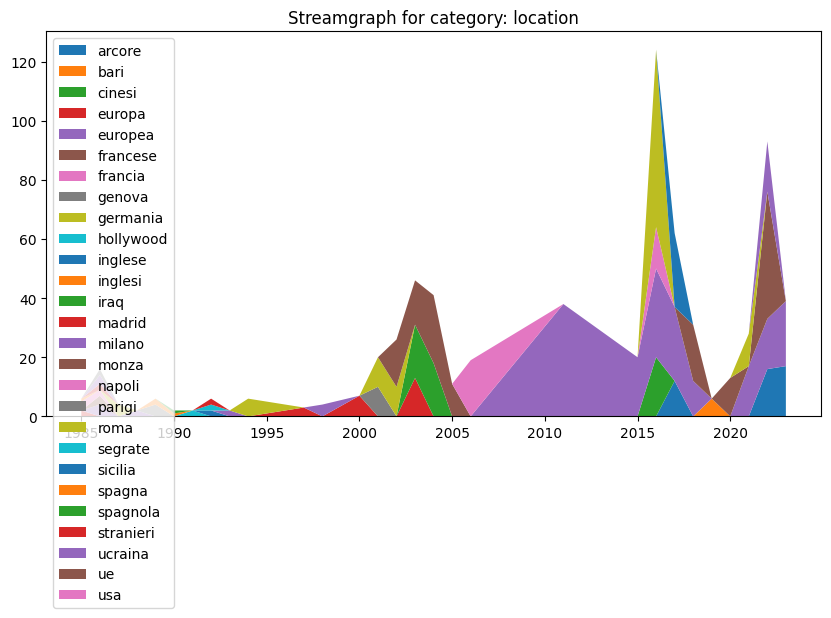

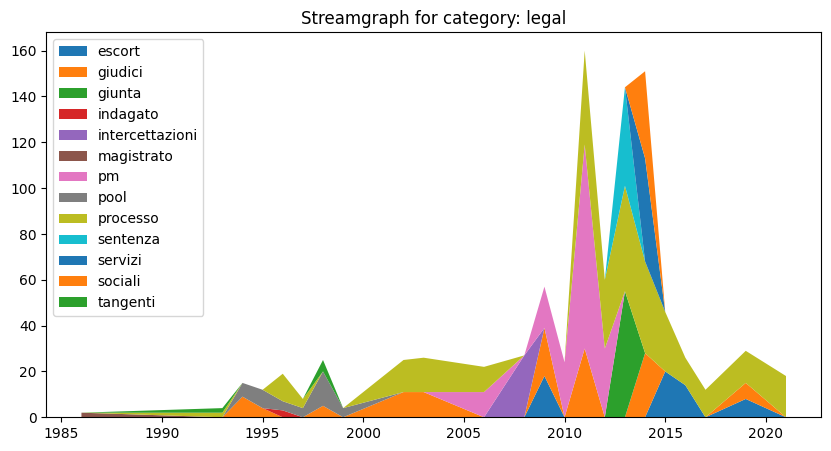

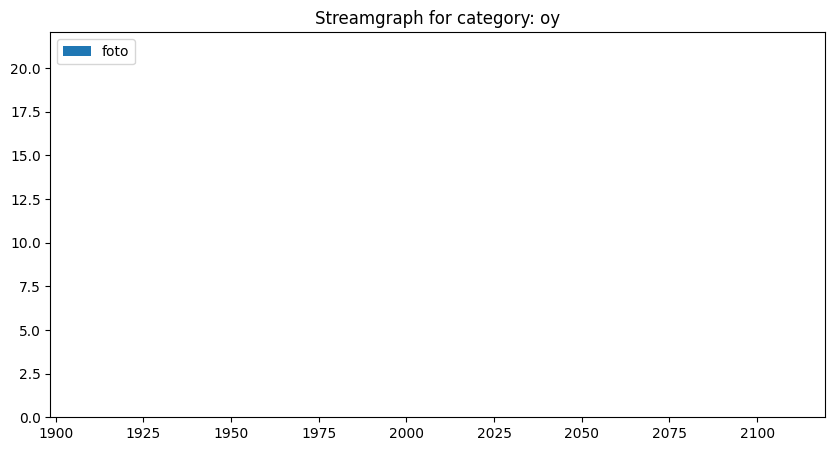

In [204]:
categories = result_df['Category'].unique()

for category in categories:
    # Filter the DataFrame for the specific category
    df_category = result_df[result_df['Category'] == category]

    # Pivot the DataFrame
    pivot_df = df_category.pivot(index='Year', columns='Word', values='Count').fillna(0)

    # Create the streamgraph
    plt.figure(figsize=(10, 5))
    plt.stackplot(pivot_df.index, pivot_df.T, labels=pivot_df.columns)
    plt.legend(loc='upper left')
    plt.title(f'Streamgraph for category: {category}')
    plt.show()

In [215]:
# group by 'Category' and create a dictionary of dataframes
grouped = dict(tuple(result_df.groupby('Category')))

# loop through the dictionary and save each dataframe to a separate csv
for category, data in grouped.items():
    data.to_csv(f"output/{category}.csv", index=False)

result_df.to_csv('general.csv', index=False)